This notebook contains Exploratory Data Analysis and Machine Learning code of binary and multiclass classification for predictive maintenance.

# Loading Data and Importing Packages

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, validation_curve, KFold, cross_val_score, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score, precision_score, recall_score
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})
path = '/content/ai4i2020.csv'
df = pd.read_csv(path)

# Exploratory Data Analysis

## Data Understanding

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [ ]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [ ]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

## Data Cleaning

As we can see, the dataset has two identifier columns for the each machine, and these two are irrelevant to the prediction objective. Thus, these columns shall be removed.

Also, the column names includes the units, which makes the names long, which is why the names will be modified for brevity.

In [ ]:
df = df.drop(columns=['Product ID', 'UDI', 'Type'])
df.rename(columns={'Air temperature [K]': 'air_temperature', 'Process temperature [K]': 'process_temperature', 'Rotational speed [rpm]':'rotational_speed', 'Torque [Nm]': 'torque',
                   'Tool wear [min]': 'tool_wear'}, inplace = True)
df.head()

,air_temperature,process_temperature,rotational_speed,torque,tool_wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


The last five columns are indicators of failures, and are indicated by 0s or 1s. Such columns cannot be used for a multiclass classification problem based on a single target variable. So, we'll create a new column with one of the folliwng five values, based on the values of these columns.

In [ ]:
def label(row):
   if row['TWF'] == 1:
      return 'tool wear failure'
   if row['HDF'] == 1:
      return 'heat dissipation failure'
   if row['PWF'] == 1:
      return 'power failure'
   if row['OSF'] == 1:
      return 'overstrain failure'
   if row['RNF'] == 1:
      return 'random failures'
   if row['Machine failure'] == 0:
      return 'no failure'

In [ ]:
df['failure type'] = df.apply(label, axis = 1)

In [ ]:
df.head()

,air_temperature,process_temperature,rotational_speed,torque,tool_wear,Machine failure,TWF,HDF,PWF,OSF,RNF,failure type
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,no failure
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,no failure
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,no failure
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,no failure
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,no failure


The column we required has been created satisfactorily. So, the other failure indicator columns are redundant. So, let's remove them.

In [ ]:
data = df

In [ ]:
df.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis = 1, inplace = True)

## Outlier Analysis

In [ ]:
def outlier_analysis(column_name):
    plt.figure(figsize=(14,4))
    return px.box(data_frame= df, y=column_name, color = 'failure type', points="all", width=1000)

In [ ]:
outlier_analysis('air_temperature')

<Figure size 1400x400 with 0 Axes>

In [ ]:
outlier_analysis('process_temperature')

<Figure size 1400x400 with 0 Axes>

In [ ]:
outlier_analysis('rotational_speed')

<Figure size 1400x400 with 0 Axes>

In [ ]:
outlier_analysis('torque')

<Figure size 1400x400 with 0 Axes>

In [ ]:
outlier_analysis('tool_wear')

<Figure size 1400x400 with 0 Axes>

1 and 2 values for tool wear and overstrain failure with respect to the tool wear metric are ouliers.

## Univariate Analysis

Checking value counts. We realise that the dataset is highly skewed and will require balancing before modelling. This is for an unordered categorical variable.

In [ ]:
px.histogram(df, y = "failure type", color="failure type")

Performing analysis on the ordered categorical variable Type. Here H stands for High, M for Medium and L for low in terms of the quality of the machine.

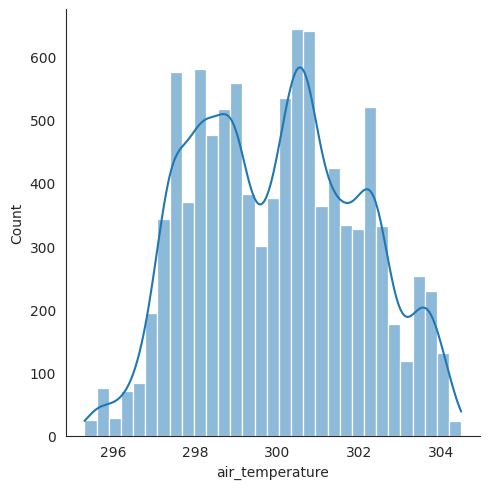

In [ ]:
sns.displot(df["air_temperature"], kde = True)
plt.show()

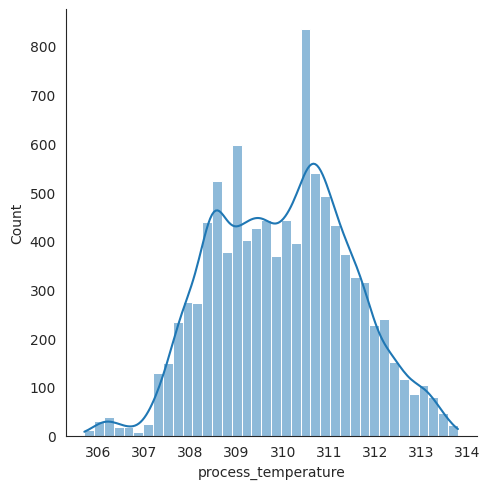

In [ ]:
sns.displot(df["process_temperature"], kde = True)
plt.show()

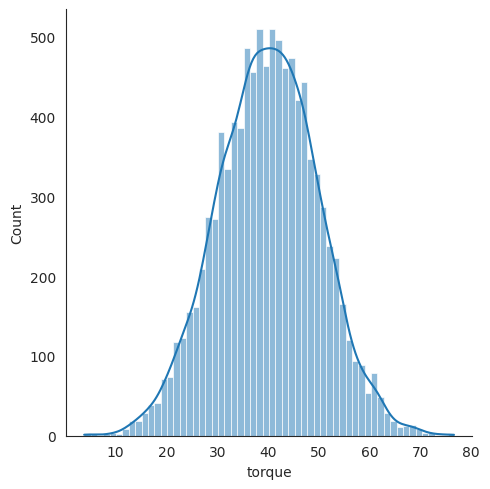

In [ ]:
sns.displot(df["torque"], kde = True)
plt.show()

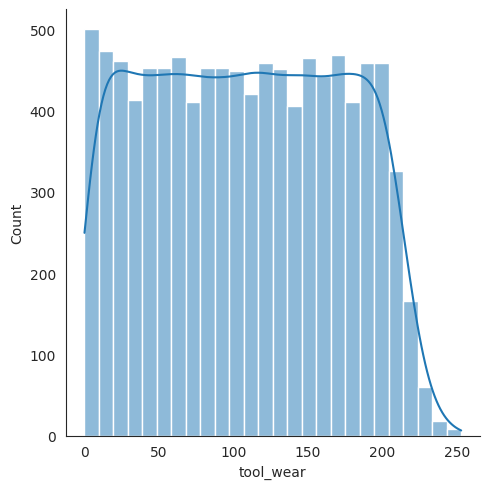

In [ ]:
sns.displot(df["tool_wear"], kde = True)
plt.show()

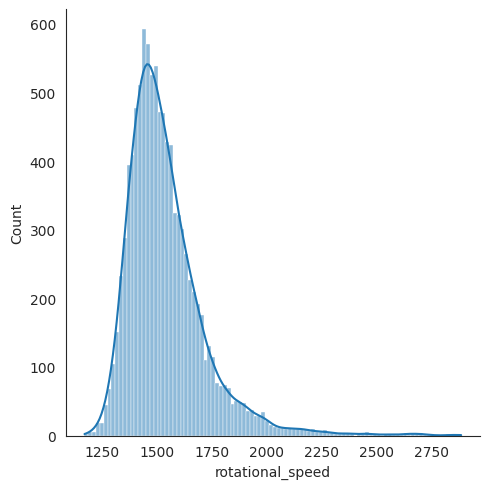

In [ ]:
sns.displot(df["rotational_speed"], kde = True)
plt.show()

## Bivariate Analysis

In [ ]:
c = df.drop(['Machine failure','failure type'], axis = 1)

In [ ]:
#sns.pairplot(df, height = 2.5, hue = 'failure type')

In [ ]:
c

,air_temperature,process_temperature,rotational_speed,torque,tool_wear
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9
...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14
9996,298.9,308.4,1632,31.8,17
9997,299.0,308.6,1645,33.4,22
9998,299.0,308.7,1408,48.5,25


<Axes: >

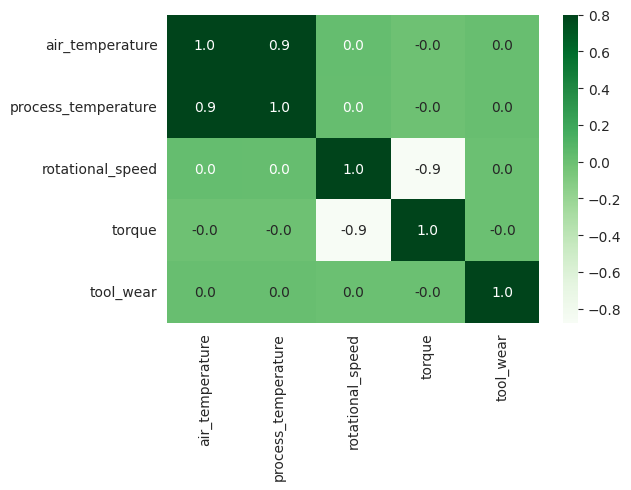

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(c.corr(), cbar=True, fmt='.1f', vmax=0.8, annot=True, cmap='Greens')

There is a strong positive correlation between air temperature and process temperature (0.). This makes sense since a high process temperature will heat up the machine and thus naturally also heat up the air around the machine. In addition, there is a strong negative correlation between rotational speed and torque (-0.9). Redundant features exist in our dataset with high correlation but seeing as we have only 6 features, we opt to keep of all them. If they are too detrimental once models are fit, they can be removed later.

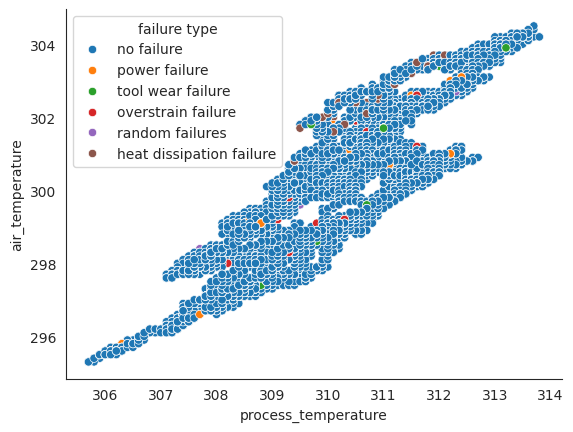

In [ ]:
sns.scatterplot(x = 'process_temperature', y = 'air_temperature', hue = "failure type", data = df)
plt.show()

Here, we performed a numerical-numerical bivariate analysis of two columns that are known be correlated.

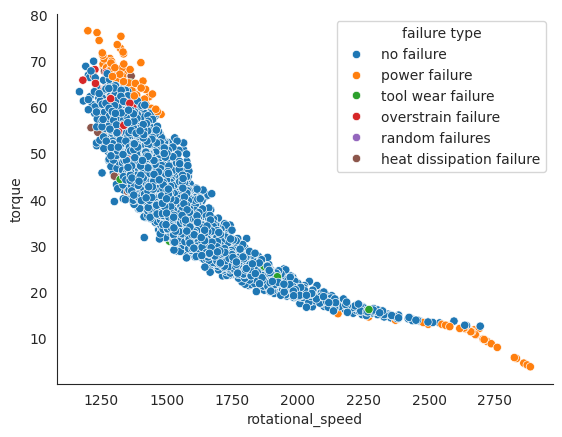

In [ ]:
sns.scatterplot(x = 'rotational_speed', y = 'torque', hue = "failure type", data = df)
plt.show()

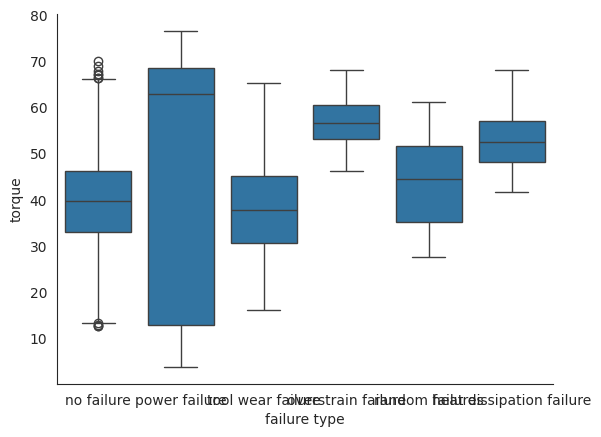

In [ ]:
sns.boxplot(data = df, x = 'failure type', y = 'torque')
plt.show()

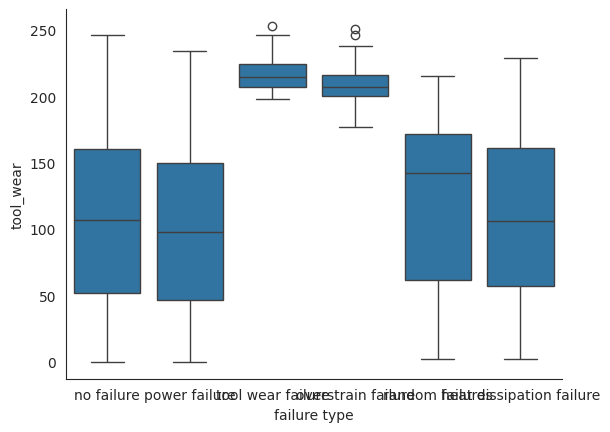

In [ ]:
sns.boxplot(data = df, x = 'failure type', y = 'tool_wear')
plt.show()

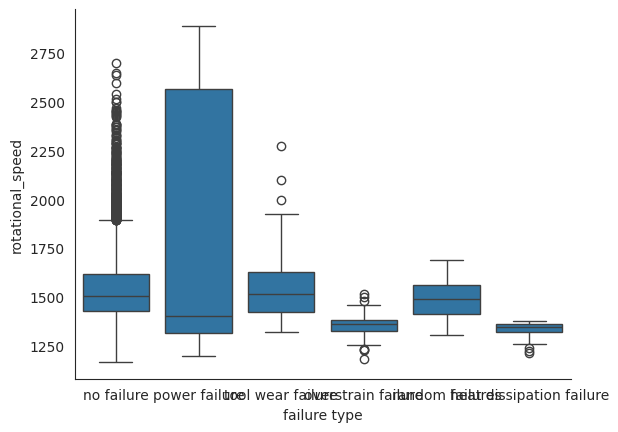

In [ ]:
sns.boxplot(data = df, x = 'failure type', y = 'rotational_speed')
plt.show()

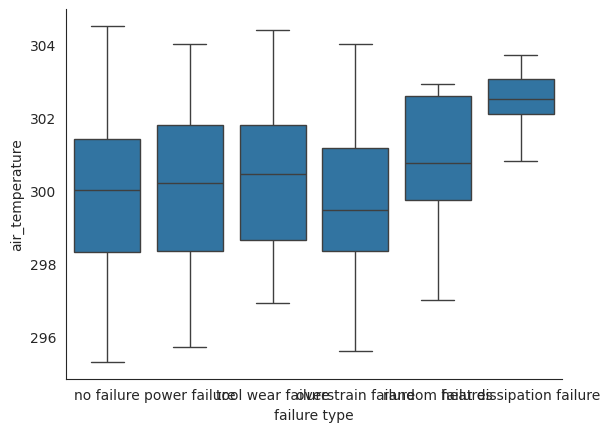

In [ ]:
sns.boxplot(data = df, x = 'failure type', y = 'air_temperature')
plt.show()

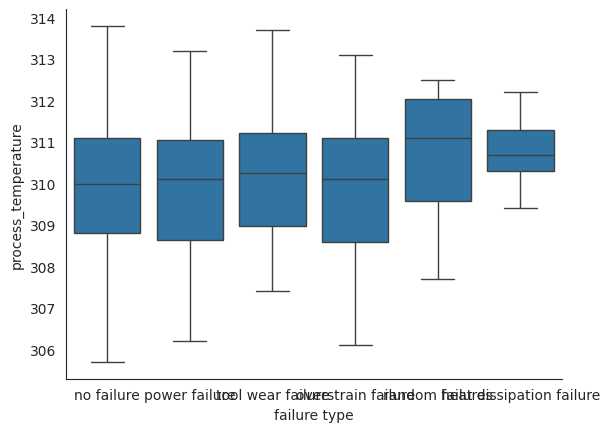

In [ ]:
sns.boxplot(data = df, x = 'failure type', y = 'process_temperature')
plt.show()

<Axes: xlabel='failure type', ylabel='tool_wear'>

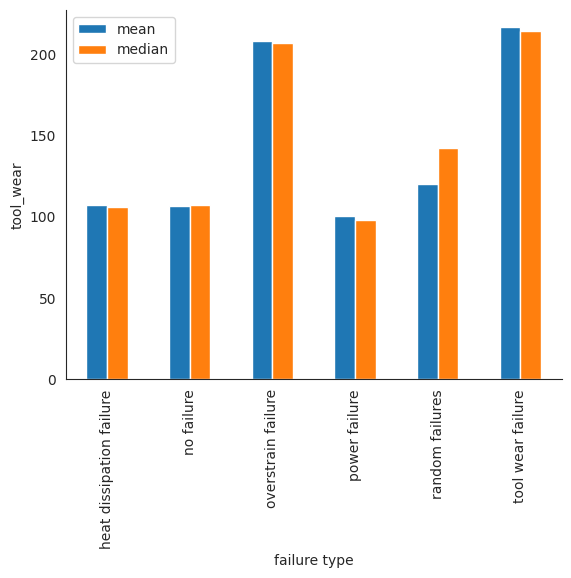

In [ ]:
df.groupby('failure type')['tool_wear'].aggregate(["mean", "median"]).plot.bar(ylabel = 'tool_wear')

<Axes: xlabel='failure type', ylabel='rotational_speed'>

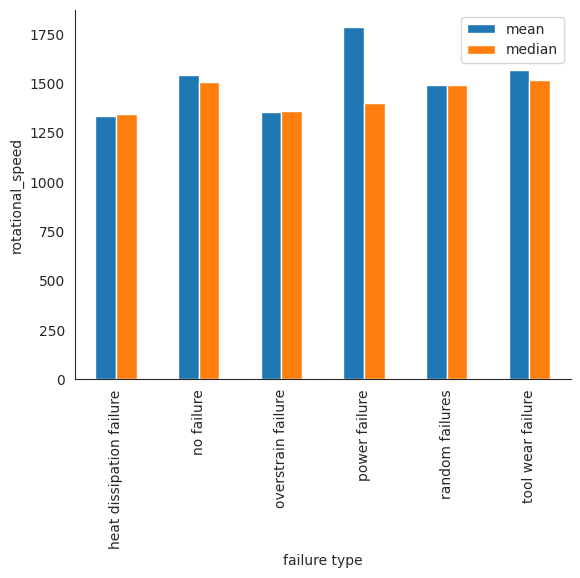

In [ ]:
df.groupby('failure type')['rotational_speed'].aggregate(["mean", "median"]).plot.bar(ylabel = 'rotational_speed')

<Axes: xlabel='failure type', ylabel='torque'>

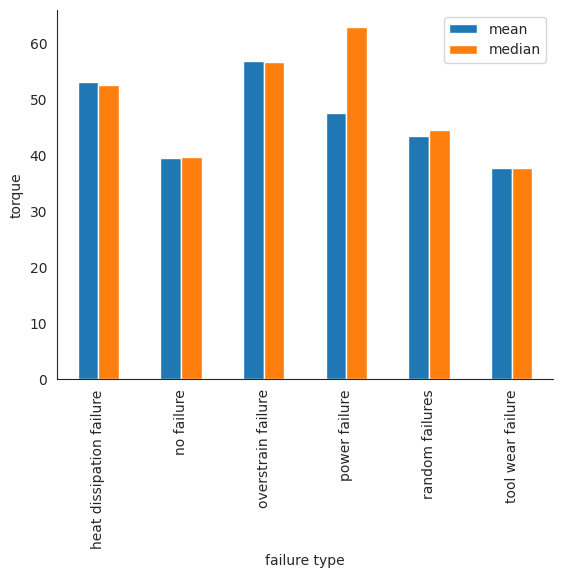

In [ ]:
df.groupby('failure type')['torque'].aggregate(["mean", "median"]).plot.bar(ylabel = 'torque')

This is a supervised learning wherein we will make use of both binary and multiclass classfication.

#Data Preprocessing, Modelling and Results

#Logistic Regression

In [ ]:
X = df.drop(['Machine failure', 'failure type'], axis=1)

In [ ]:
y = df['Machine failure']

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
scaler = StandardScaler()

X_train[['air_temperature','process_temperature','rotational_speed', 'torque', 'tool_wear']] = scaler.fit_transform(X_train[['air_temperature','process_temperature','rotational_speed', 'torque', 'tool_wear']])

X_train.head()

,air_temperature,process_temperature,rotational_speed,torque,tool_wear
1191,-1.415436,-1.157564,1.337084,-1.203018,-1.026073
4458,1.305255,0.267422,-0.333440,0.757916,1.280297
1131,-1.616969,-1.428990,-0.271776,-0.665503,0.237691
9562,-0.155857,0.674561,-0.574489,0.996811,0.948559
6579,0.650274,0.267422,-0.204507,0.150723,1.327688


In [ ]:
failure = (sum(df['Machine failure'])/len(df['Machine failure'].index))*100
failure

3.39

In [ ]:
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Machine failure   No. Observations:                 7000
Model:                            GLM   Df Residuals:                     6994
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -685.95
Date:                Thu, 25 Apr 2024   Deviance:                       1371.9
Time:                        17:16:42   Pearson chi2:                 7.77e+03
No. Iterations:                     8   Pseudo R-squ. (CS):            0.09500
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.7943      0.143    -33.626      0.000      -5.074      -4.515
air_temperature         1.4078      0.169      8.313      0.000       1.076       1.740
process_temperature    -1.0175      0.168     -6.067      0.000      -1.346      -0.689
rotational_speed        2.0118      0.111     18.062      0.000       1.794       2.230
torque                  2.7404      0.134     20.526      0.000       2.479       3.002
tool_wear               0.7806      0.085      9.190      0.000       0.614       0.947
=======================================================================================
"""

In [ ]:
logreg = LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, step = 5)
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe.support_

array([False, False,  True,  True, False])

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('air_temperature', False, 2),
 ('process_temperature', False, 2),
 ('rotational_speed', True, 1),
 ('torque', True, 1),
 ('tool_wear', False, 2)]

In [ ]:
col = X_train.columns[rfe.support_]

In [ ]:
X_train.columns[~rfe.support_]

Index(['air_temperature', 'process_temperature', 'tool_wear'], dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Machine failure   No. Observations:                 7000
Model:                            GLM   Df Residuals:                     6997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -775.17
Date:                Thu, 25 Apr 2024   Deviance:                       1550.3
Time:                        17:16:59   Pearson chi2:                 9.69e+03
No. Iterations:                     7   Pseudo R-squ. (CS):            0.07164
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.2371      0.110    -38.563      0.000      -4.452      -4.022
rotational_speed     1.8228      0.099     18.325      0.000       1.628       2.018
torque               2.4820      0.118     20.974      0.000       2.250       2.714
====================================================================================
"""

In [ ]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1191    0.008279
4458    0.049091
1131    0.001685
9562    0.056777
6579    0.014262
4201    0.030659
138     0.055197
9407    0.056777
5327    0.016250
6815    0.012440
dtype: float64

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00827892, 0.04909147, 0.00168503, 0.05677653, 0.01426224,
       0.03065931, 0.05519718, 0.05677653, 0.01625046, 0.01244041])

In [ ]:
y_train_pred_final = pd.DataFrame({'Failure':y_train.values, 'Failure_Prob':y_train_pred})
y_train_pred_final['ProductID'] = y_train.index
y_train_pred_final.head()

,Failure,Failure_Prob,ProductID
0,0,0.008279,1191
1,0,0.049091,4458
2,0,0.001685,1131
3,0,0.056777,9562
4,0,0.014262,6579


In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Failure_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Failure,Failure_Prob,ProductID,predicted
0,0,0.008279,1191,0
1,0,0.049091,4458,0
2,0,0.001685,1131,0
3,0,0.056777,9562,0
4,0,0.014262,6579,0


In [ ]:
confusion = confusion_matrix(y_train_pred_final.Failure, y_train_pred_final.predicted )
print(confusion)

[[6760    3]
 [ 192   45]]


In [ ]:
# Let's check the overall accuracy.
print(accuracy_score(y_train_pred_final.Failure, y_train_pred_final.predicted))

0.9721428571428572


In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,rotational_speed,4.24
1,torque,4.24


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
TP / float(TP+FN)

0.189873417721519

In [ ]:
TN / float(TN+FP)

0.9995564098772733

In [ ]:
print(FP/ float(TN+FP))

0.00044359012272660064


In [ ]:
print (TP / float(TP+FP))

0.9375


In [ ]:
print (TN / float(TN+ FN))

0.9723820483314154


In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
y_train_pred_final.head()

,Failure,Failure_Prob,ProductID,predicted
0,0,0.008279,1191,0
1,0,0.049091,4458,0
2,0,0.001685,1131,0
3,0,0.056777,9562,0
4,0,0.014262,6579,0


In [ ]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Failure, y_train_pred_final.Failure_Prob, drop_intermediate = False )

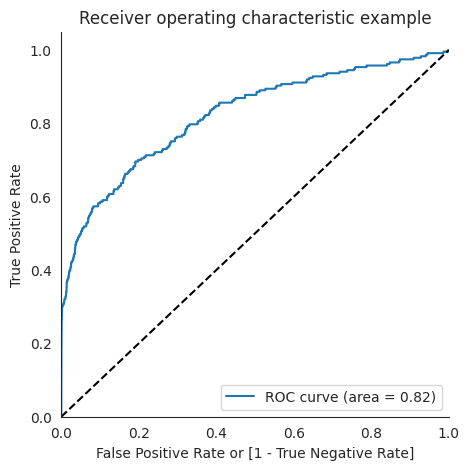

In [ ]:
draw_roc(y_train_pred_final.Failure, y_train_pred_final.Failure_Prob)

##Naive Bayes Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [ ]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred_class = bnb.predict(X_test)
y_pred_proba =bnb.predict_proba(X_test)
accuracy_score(y_test, y_pred_class)

0.9644

In [ ]:
confusion_matrix(y_test, y_pred_class)

array([[2411,    0],
       [  89,    0]])

In [ ]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.189873417721519


In [ ]:
specificity = TN / float(TN + FP)

print("specificity",specificity)

specificity 0.9995564098772733


In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [ ]:
print (roc_auc)

0.49336374948154293


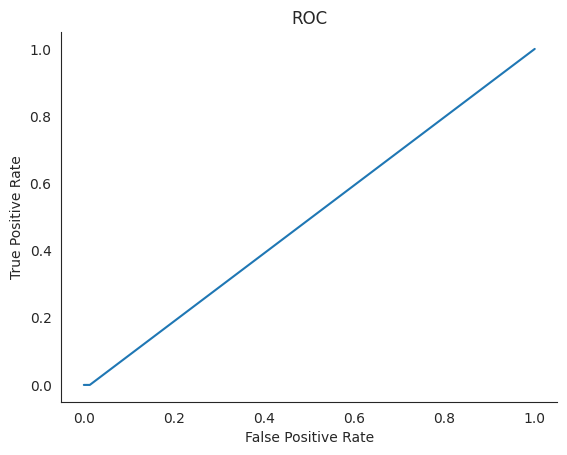

In [ ]:
%matplotlib inline
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

#Support Vector Machine

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [ ]:
model = SVC(C = 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print("accuracy", accuracy_score(y_test, y_pred))
print("precision", precision_score(y_test, y_pred))
print("recall", recall_score(y_test, y_pred))

[[2903    0]
 [  96    1]]
accuracy 0.968
precision 1.0
recall 0.010309278350515464


#Decision Tree Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((7000, 5), (3000, 5))

In [ ]:
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

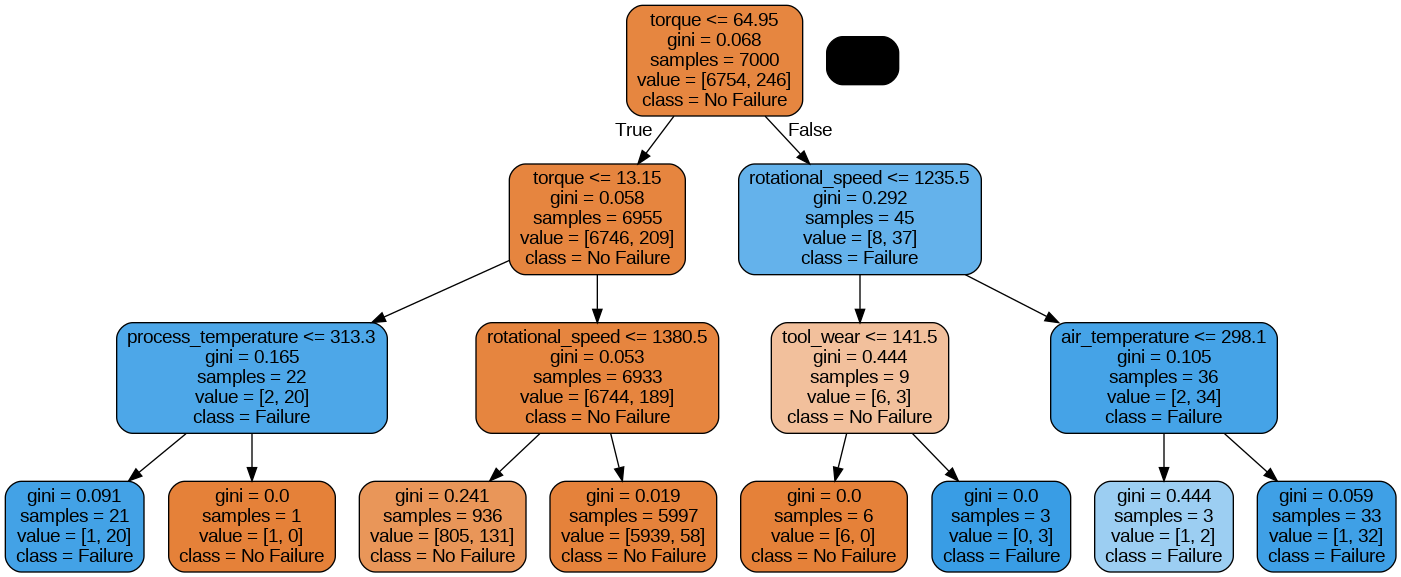

In [ ]:
dot_data = StringIO()

export_graphviz(dt, out_file = dot_data, filled = True, rounded = True,
                feature_names = X.columns,
                class_names = ['No Failure', "Failure"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.975


array([[2903,    4],
       [  71,   22]])

#Random Forest Classifier

##Binary Classification

In [ ]:
rf = RandomForestClassifier(random_state = 42, n_estimators = 10, max_depth = 3)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [ ]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1608637542)

In [ ]:
sample_tree = rf.estimators_[4]

In [ ]:
def get_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns,
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

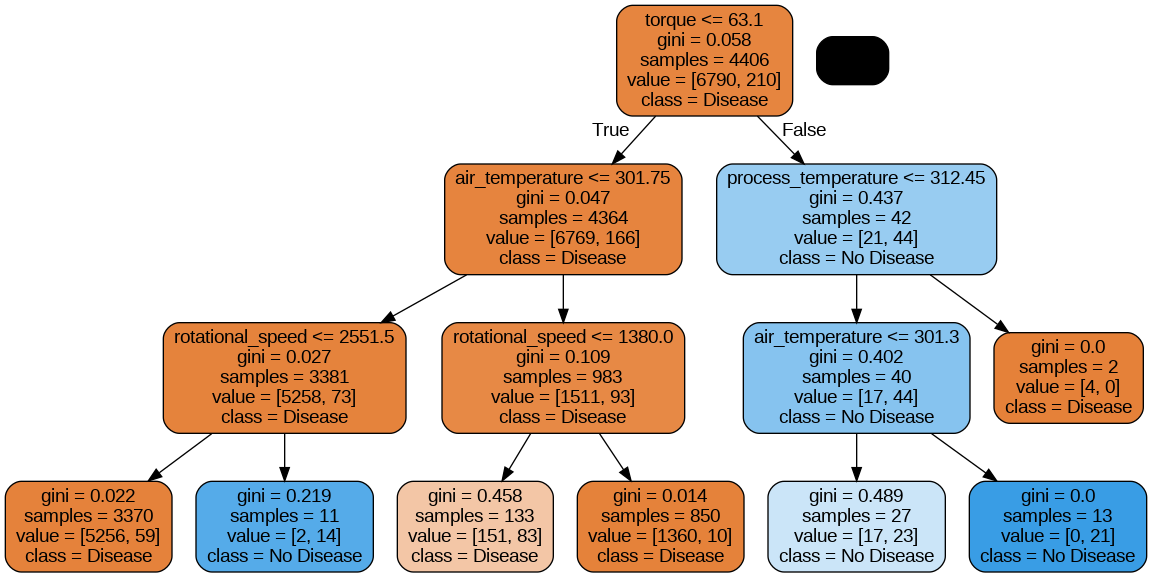

In [ ]:
gph = get_graph(sample_tree)
Image(gph.create_png(), width = 700, height = 700)

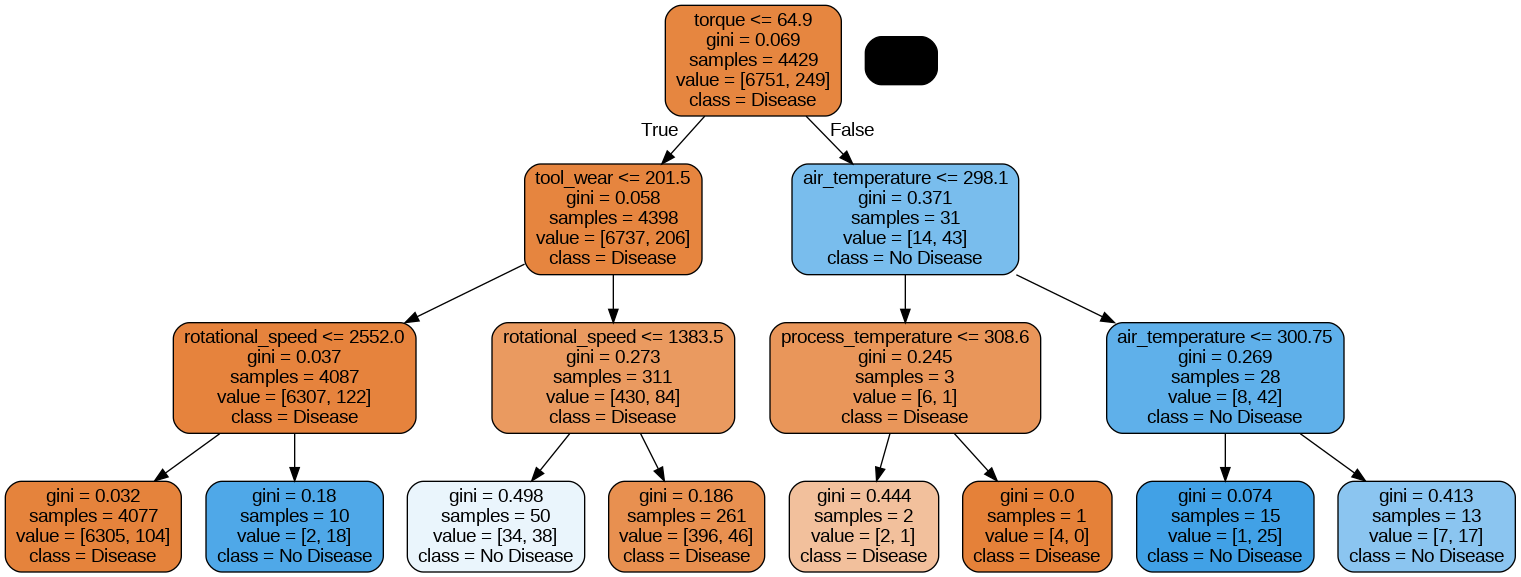

In [ ]:
gph = get_graph(rf.estimators_[2])
Image(gph.create_png(), width=700, height=700)

In [ ]:
def evaluate_model(classifier):
    print("Train Accuracy :", accuracy_score(y_train, classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, classifier.predict(X_test)))

In [ ]:
evaluate_model(rf)

Train Accuracy : 0.972
Train Confusion Matrix:
[[6750    4]
 [ 192   54]]
--------------------------------------------------
Test Accuracy : 0.9746666666666667
Test Confusion Matrix:
[[2903    4]
 [  72   21]]


##Multiclass Classification

In [ ]:
X = df.drop(['Machine failure', 'failure type'], axis=1)

In [ ]:
y = df['failure type']

In [ ]:
y_train.head()

9069    0
2603    0
7738    0
1579    0
5058    0
Name: Machine failure, dtype: int64

In [ ]:
def data_preparation(df_base, target_name):
    df = df_base.dropna()

    df['target_name_encoded'] = df[target_name].replace({'no failure': 0, 'power failure': 1, 'tool wear failure': 2, 'overstrain failure': 3, 'random failures': 4, 'heat dissipation failure': 5})
    #df['Type'].replace({'L': 0, 'M': 1, 'H': 2}, inplace=True)
    X = df.drop(columns=[target_name, 'target_name_encoded', 'Machine failure'])
    y = df['target_name_encoded'] #Prediction label

    # split the data into x_train and y_train data sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

    # print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
    print('train: ', X_train.shape, y_train.shape)
    print('test: ', X_test.shape, y_test.shape)
    return X, y, X_train, X_test, y_train, y_test

# remove target from training data
X, y, X_train, X_test, y_train, y_test = data_preparation(df, 'failure type')


train:  (6993, 5) (6993,)
test:  (2998, 5) (2998,)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support as score, roc_curve
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate
from sklearn.utils import compute_sample_weight
from xgboost import XGBClassifier

In [ ]:
weight_train = compute_sample_weight('balanced', y_train)
weight_test = compute_sample_weight('balanced', y_test)
xgb_clf = XGBClassifier(booster = 'gbtree', tree_method = 'hist', sampling_method = 'uniform', eval_metric = 'aucpr', objective = 'multi:softmax', num_class = 6)
xgb_clf.fit(X_train, y_train, sample_weight = weight_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=6,
              num_parallel_tree=None, ...)

In [ ]:
score = xgb_clf.score(X_test, y_test.ravel(), sample_weight=weight_test)
y_pred = xgb_clf.predict(X_test)
results_log = classification_report(y_test, y_pred)
print(results_log)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2880
           1       0.76      0.87      0.81        30
           2       0.00      0.00      0.00        16
           3       0.55      0.86      0.67        28
           4       0.00      0.00      0.00         7
           5       0.83      0.95      0.89        37

    accuracy                           0.97      2998
   macro avg       0.52      0.61      0.56      2998
weighted avg       0.97      0.97      0.97      2998



#Feature Importance

In [ ]:
classifier_rf = RandomForestClassifier(random_state = 42, n_jobs = -1, max_depth = 5, n_estimators = 100, oob_score = True)

In [ ]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
classifier_rf.feature_importances_

array([0.09997313, 0.068297  , 0.26249096, 0.44473485, 0.12450406])

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": classifier_rf.feature_importances_
})

In [ ]:
imp_df.sort_values(by = "Imp", ascending = False)

,Varname,Imp
3,torque,0.444735
2,rotational_speed,0.262491
4,tool_wear,0.124504
0,air_temperature,0.099973
1,process_temperature,0.068297
